# WeRateDogs Twitter Data Wrangling & Analysis
***
> __Tarun Lingam__

In [1]:
# Import the reqired packages
import tweepy
import json
import requests
import re
import os
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
% matplotlib inline 

## Gather


Data will need to be gathered from several different locations to obtain all of the necessary information for this project.
1. The WeRateDogs Twitter archive (**twitter-archive-enhanced.csv**) - this is a file that is directly accessible.
2. The tweet image predictions (**image_predictions.tsv**) - this is hosted on Udacity's server.
3. Additional tweet information - this can be obtained by querying the Twitter API using Tweepy.

In [2]:
# Read the Twitter archive into a dataframe
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
# Get the image predictions using Udacity's url
image_preds = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
# Save the file as 'image-predictions.tsv' from the content of 'image_preds'
with open('image-predictions.tsv', mode='wb') as file:
    file.write(image_preds.content)

In [4]:
# Read the image-predictions data into a dataframe
image_predictions = pd.read_csv('image-predictions.tsv', sep = '\t')

###### Check if all the tweets in image_predictions are also in twitter_archive.

In [5]:
# Check if all the Tweet IDs are unique in both the dataframes
twitter_archive.tweet_id.unique().size, image_predictions.tweet_id.unique().size

(2356, 2075)

In [6]:
# Concatenate the Tweet IDs from twitter_archive and image_predictions
all_IDs = pd.concat([twitter_archive.tweet_id, image_predictions.tweet_id])
all_IDs.unique().size

2356

- This shows that the list of tweet IDs from twitter_archive includes all of the Tweet IDs from image_prediction.

###### Set up Twitter API using Tweepy

In [7]:
consumer_key = 'YOUR CONSUMER KEY'
consumer_secret = 'YOUR CONSUMER SECRET'
access_token = 'YOUR ACCESS TOKEN'
access_secret = 'YOUR ACCESS SECRET'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)


api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

###### Gather each Tweet's retweet_count and favorite_count and write the JSON data to file.

In [8]:
tweet_data=[]
for index, rows in twitter_archive.iterrows():
    print(rows.tweet_id)
    try:
        tweet = api.get_status(rows.tweet_id, tweet_mode='extended')._json
        tweet_data.append(tweet)
    except:
        print('No data for: {}'.format(rows.tweet_id))
        
with open('tweet_json.txt', mode='w', encoding='utf-8') as outfile:
    json.dump(tweet_data, outfile)

892420643555336193
892177421306343426
891815181378084864
891689557279858688
891327558926688256
891087950875897856
890971913173991426
890729181411237888
890609185150312448
890240255349198849
890006608113172480
889880896479866881
889665388333682689
889638837579907072
889531135344209921
889278841981685760
888917238123831296
888804989199671297
888554962724278272
888202515573088257
No data for: 888202515573088257
888078434458587136
887705289381826560
887517139158093824
887473957103951883
887343217045368832
887101392804085760
886983233522544640
886736880519319552
886680336477933568
886366144734445568
886267009285017600
886258384151887873
886054160059072513
885984800019947520
885528943205470208
885518971528720385
885311592912609280
885167619883638784
884925521741709313
884876753390489601
884562892145688576
884441805382717440
884247878851493888
884162670584377345
883838122936631299
883482846933004288
883360690899218434
883117836046086144
882992080364220416
882762694511734784
882627270321602560

822489057087389700
822462944365645825
822244816520155136
822163064745328640
821886076407029760
821813639212650496
821765923262631936
821522889702862852
821421320206483457
821407182352777218
821153421864615936
821149554670182400
821107785811234820
821044531881721856
820837357901512704
820749716845686786
820690176645140481
820494788566847489
820446719150292993
820314633777061888
820078625395449857
820013781606658049
819952236453363712
819924195358416896
819711362133872643
819588359383371776
819347104292290561
819238181065359361
819227688460238848
819015337530290176
819015331746349057
819006400881917954
819004803107983360
818646164899774465
818627210458333184
818614493328580609
818588835076603904
818536468981415936
818307523543449600
818259473185828864
818145370475810820
817908911860748288
817827839487737858
817777686764523521
817536400337801217
817502432452313088
817423860136083457
817415592588222464
817181837579653120
817171292965273600
817120970343411712
817056546584727552
816829038950

766423258543644672
766313316352462849
766078092750233600
766069199026450432
766008592277377025
765719909049503744
765669560888528897
765395769549590528
765371061932261376
765222098633691136
764857477905154048
764259802650378240
763956972077010945
763837565564780549
763183847194451968
763167063695355904
763103485927849985
762699858130116608
762471784394268675
762464539388485633
762316489655476224
762035686371364864
761976711479193600
761750502866649088
761745352076779520
761672994376806400
761599872357261312
761371037149827077
761334018830917632
761292947749015552
761227390836215808
761004547850530816
760893934457552897
760656994973933572
760641137271070720
760539183865880579
760521673607086080
760290219849637889
760252756032651264
760190180481531904
760153949710192640
759943073749200896
759923798737051648
759846353224826880
759793422261743616
759566828574212096
759557299618865152
759447681597108224
759446261539934208
759197388317847553
759159934323924993
759099523532779520
759047813560

709158332880297985
709042156699303936
708853462201716736
708845821941387268
708834316713893888
708810915978854401
708738143638450176
708711088997666817
708479650088034305
708469915515297792
708400866336894977
708356463048204288
708349470027751425
708149363256774660
708130923141795840
708119489313951744
708109389455101952
708026248782585858
707995814724026368
707983188426153984
707969809498152960
707776935007539200
707741517457260545
707738799544082433
707693576495472641
707629649552134146
707610948723478529
707420581654872064
707411934438625280
707387676719185920
707377100785885184
707315916783140866
707297311098011648
707059547140169728
707038192327901184
707021089608753152
707014260413456384
706904523814649856
706901761596989440
706681918348251136
706644897839910912
706593038911545345
706538006853918722
706516534877929472
706346369204748288
706310011488698368
706291001778950144
706265994973601792
706169069255446529
706166467411222528
706153300320784384
705975130514706432
705970349788

680609293079592961
680583894916304897
680497766108381184
680494726643068929
680473011644985345
680440374763077632
680221482581123072
680206703334408192
680191257256136705
680176173301628928
680161097740095489
680145970311643136
680130881361686529
680115823365742593
680100725817409536
680085611152338944
680070545539371008
680055455951884288
679877062409191424
679872969355714560
679862121895714818
679854723806179328
679844490799091713
679828447187857408
679777920601223168
679736210798047232
679729593985699840
679722016581222400
679530280114372609
679527802031484928
679511351870550016
679503373272485890
679475951516934144
679462823135686656
679405845277462528
679158373988876288
679148763231985668
679132435750195208
679111216690831360
679062614270468097
679047485189439488
679001094530465792
678991772295516161
678969228704284672
678800283649069056
678798276842360832
678774928607469569
678767140346941444
678764513869611008
678755239630127104
678740035362037760
678708137298427904
678675843183

670003130994700288
669993076832759809
669972011175813120
669970042633789440
669942763794931712
669926384437997569
669923323644657664
669753178989142016
669749430875258880
669684865554620416
669683899023405056
669682095984410625
669680153564442624
669661792646373376
669625907762618368
669603084620980224
669597912108789760
669583744538451968
669573570759163904
669571471778410496
669567591774625800
669564461267722241
669393256313184256
669375718304980992
669371483794317312
669367896104181761
669363888236994561
669359674819481600
669354382627049472
669353438988365824
669351434509529089
669328503091937280
669327207240699904
669324657376567296
669216679721873412
669214165781868544
669203728096960512
669037058363662336
669015743032369152
669006782128353280
669000397445533696
668994913074286592
668992363537309700
668989615043424256
668988183816871936
668986018524233728
668981893510119424
668979806671884288
668975677807423489
668967877119254528
668960084974809088
668955713004314625
668932921458

In [9]:
# Read the JSON file (tweet_json.txt) into a data frame
tweet_data_full = pd.read_json('tweet_json.txt')

In [10]:
# Dictionary to store the tweet data 
data = []
for i, tweet in tweet_data_full.iterrows():
    tweet_id = tweet.id
    fav_count = tweet.favorite_count
    retweet_count = tweet.retweet_count
    
    # Append to df_list
    data.append({'tweet_id':tweet_id, 'retweet_count': retweet_count,
                   'fav_count': fav_count})
# Create dataframe    
tweet_data = pd.DataFrame(data, columns=['tweet_id', 'retweet_count', 'fav_count'])

# Save dataframe to csv
tweet_data.to_csv('tweet_data.csv', index=False)

## Assess

Now that all the data has been gathered, I need to assess the data and structure, and see what needs to be done to get that data ready for analysis. This involves these two data frames:
1. twitter_archive
2. image_predicitons
3. tweet_data

### Visual Assesment

In [11]:
# Visually assess twitter_archive
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [12]:
# Visually assess image_predictions
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [13]:
# Visually assess tweet_data
tweet_data

,tweet_id,retweet_count,fav_count
0,892420643555336193,8563,38705
1,892177421306343426,6299,33175
2,891815181378084864,4180,24975
3,891689557279858688,8694,42106
4,891327558926688256,9455,40246
5,891087950875897856,3133,20179
6,890971913173991426,2086,11821
7,890729181411237888,18998,65392
8,890609185150312448,4284,27734
9,890240255349198849,7455,31880


### Programmatic Assesment

In [14]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [15]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [16]:
# Check for duplicates
twitter_archive.duplicated().sum()

0

In [17]:
# Check for rows where the denominator is not 10
twitter_archive[twitter_archive.rating_denominator != 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


In [18]:
# Check category columns for validity.
twitter_archive.doggo.unique(), twitter_archive.floofer.unique(), twitter_archive.pupper.unique(), twitter_archive.puppo.unique()

(array(['None', 'doggo'], dtype=object),
 array(['None', 'floofer'], dtype=object),
 array(['None', 'pupper'], dtype=object),
 array(['None', 'puppo'], dtype=object))

In [19]:
# Check for any instances where there is more than one category per record?
(twitter_archive.doggo + twitter_archive.floofer + twitter_archive.puppo + twitter_archive.pupper).unique()

array(['NoneNoneNoneNone', 'doggoNoneNoneNone', 'NoneNonepuppoNone',
       'NoneNoneNonepupper', 'NoneflooferNoneNone', 'doggoNonepuppoNone',
       'doggoflooferNoneNone', 'doggoNoneNonepupper'], dtype=object)

- There are instances of more than one category per record, so I won't combine the categories.

In [20]:
# Assess image_predictions
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [21]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [22]:
# Check for duplicates
image_predictions.duplicated().sum()

0

In [23]:
# Assess tweet_data
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2345 entries, 0 to 2344
Data columns (total 3 columns):
tweet_id         2345 non-null int64
retweet_count    2345 non-null int64
fav_count        2345 non-null int64
dtypes: int64(3)
memory usage: 55.0 KB


In [24]:
tweet_data.describe()

,tweet_id,retweet_count,fav_count
count,2.345000e+03,2345.000000,2345.000000
mean,7.422940e+17,3016.912580,8047.927079
std,6.833642e+16,5018.376909,12111.071376
min,6.660209e+17,0.000000,0.000000
25%,6.783802e+17,605.000000,1403.000000
50%,7.189392e+17,1405.000000,3526.000000
75%,7.986979e+17,3511.000000,9944.000000
max,8.924206e+17,77168.000000,143078.000000


### Quality Issues

**Guidelines**
1. **Completeness:** Do we have all the records that we should? Do we have missing records? Are there specific rows, columns, or cells missing?
2. **Validity:** Do the records conform to a defined schema? A schema is a defined set of rules for data. These rules can be real-world constraints (e.g. negative height is impossible) and table-specific constraints (e.g. unique key constraints in tables).
3. **Accuracy:** Inaccurate data is wrong data that is valid. It adheres to the defined schema, but it is still incorrect. E.g: A patient's weight that is 15 lbs too heavy because the scale was faulty.
4. **Consistency:** Inconsistent data is both valid and accurate, but there are multiple correct ways of referring to the same thing. Consistency, i.e., a standard format, in columns that represent the same data across tables and/or within tables is desired.

**twitter_archive**
- The columns, 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', and 'retweeted_status_timestamp' have a lot of NaN. (But, upon looking again, I think this is okay)
- Timestamps include a "+0000", which isn't helpful, and aren't actually datetime objects.
- Some ratings are not on a 10 scale (i.e. denominator not equal to 10). One of the reasons is, if there is more than one dog in the picture, the rating multiplies by the number of dogs (i.e. 12/10, but two dogs -> 24/20)
  * add a column for the number of dogs, and then normalize the rating
- Rating denominators that are not equal to 10.
- Ratings that seem erroneous (not a multiple of X/10). Seem like the wrong 'rating' was pulled from the text.
- Missing ratings.
- 'doggo', 'floofer', 'puppo', and 'pupper' should be categories, not strings.
- The id columns should be strings, not floats.

**image_predictions**
- The column headers could be more descriptive/intuitive. For example...
  * 'p1_dog' to 'p1_is_a_dog'
  * 'p1' to 'prediction1'
  * 'p1_conf' to 'p1_confidence'
- Dog breeds sometimes capitalized sometimes not.
- There are a number of pictures that probably aren't of dogs (hens, shopping carts, etc.)

### Tidyness

**Guidelines**
1. Each variable forms a column.
2. Each observation forms a row.
3. Each type of observational unit forms a table.

**twitter_archive**

**image_predictions**
- combine this table with the twitter_archive table, joined on tweet ID.

**tweet_data**
- combine this table with twitter_archive table, joined on tweet ID.

## Clean

Define, code, and then test each of the issues found during the assessment phase.

In [25]:
# Make copies of the dataframes
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
tweet_data_clean = tweet_data.copy()

### Quality Issues

#### 1) Incorrect Ratings
##### Define

- Some ratings are incorrect, and have been pulled from the wrong piece of text.
-  The rating is in the form of "##/##", and the first instance of such is pulled. Consequently, if the text contains something like '24/7' or '9/11', then that can get identified as the rating, even if there's an actual rating later.
- I want to get the correct rating from the tweet's text using a regular expression.

##### Code

In [26]:
# Extract the rating into a new column, then compare to the old rating
twitter_archive_clean['new_rating'] = twitter_archive_clean.text.str.extract('(\d+?/[^0]\d?0)', expand=True)
twitter_archive_clean['old_rating'] = twitter_archive_clean.rating_numerator.astype('str') + '/' + twitter_archive_clean.rating_denominator.astype('str')

twitter_archive_clean[twitter_archive_clean.old_rating != twitter_archive_clean.new_rating]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,new_rating,old_rating
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None,13/10,960/0
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None,NaN,11/15
387,826598799820865537,8.265984e+17,4.196984e+09,2017-02-01 01:11:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I was going to do 007/10, but the joke wasn't ...",NaN,NaN,NaN,NaN,7,10,None,None,None,None,None,007/10,7/10
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None,NaN,24/7
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None,14/10,9/11
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None,14/10,9/11
1662,682962037429899265,NaN,NaN,2016-01-01 16:30:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darrel. He just robbed a 7/11 and is i...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682962037...,7,11,Darrel,None,None,None,None,10/10,7/11
1663,682808988178739200,6.827884e+17,4.196984e+09,2016-01-01 06:22:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I'm aware that I could've said 20/16, but here...",NaN,NaN,NaN,NaN,20,16,None,None,None,None,None,NaN,20/16
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,1,2,an,None,None,None,None,9/10,1/2


In [27]:
# One cell still has an erroneous rating, '007/10'. Replace rating with NaN
twitter_archive_clean.replace({'007/10': np.nan}, inplace=True)

In [28]:
# Drop the old_rating column
twitter_archive_clean.drop('old_rating', axis=1, inplace=True)

In [29]:
# Split new_rating into the numerator and denominator
twitter_archive_clean.rating_numerator, twitter_archive_clean.rating_denominator = twitter_archive_clean.new_rating.str.split('/').str

# Convert columns to numeric
twitter_archive_clean.rating_numerator = twitter_archive_clean.rating_numerator.astype('float')
twitter_archive_clean.rating_denominator = twitter_archive_clean.rating_denominator.astype('float')

##### Test

In [30]:
twitter_archive_clean.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2352.000000,2352.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,12.728741,10.459184
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,41.551938,6.743274
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,10.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


##### Define
Now I want to handle the excessively large ratings by making a 'number_of_dogs' column, and then dividing the rating by that number. The number of dogs should be the denominator of the rating divided by ten.

##### Code

In [31]:
# Create 'number_of_dogs' column
twitter_archive_clean['number_of_dogs'] = twitter_archive_clean.rating_denominator / 10

##### Test

In [32]:
twitter_archive_clean.number_of_dogs.unique()

array([  1.,  nan,   7.,  15.,  17.,   2.,   5.,   9.,   8.,   4.,  13.,
        11.,  12.])

- These are all whole numbers, so that makes sense.
- Now, I want to divide the numerator and denominator by the number of dogs in order to normalize the ratings to a rating/10.

##### Code

In [33]:
twitter_archive_clean.rating_numerator = twitter_archive_clean.rating_numerator / twitter_archive_clean.number_of_dogs
twitter_archive_clean.rating_denominator = twitter_archive_clean.rating_denominator / twitter_archive_clean.number_of_dogs

twitter_archive_clean.rating_numerator.unique(), twitter_archive_clean.rating_denominator.unique()

(array([  1.30000000e+01,   1.20000000e+01,   1.40000000e+01,
          5.00000000e+00,   1.70000000e+01,   1.10000000e+01,
          1.00000000e+01,   4.20000000e+02,   6.66000000e+02,
          6.00000000e+00,   1.50000000e+01,   1.82000000e+02,
          0.00000000e+00,   7.50000000e+01,              nan,
          7.00000000e+00,   9.00000000e+00,   8.00000000e+00,
          1.00000000e+00,   2.70000000e+01,   3.00000000e+00,
          4.00000000e+00,   1.77600000e+03,   2.00000000e+00,
          2.60000000e+01]), array([ 10.,  nan]))

In [34]:
# Drop the new_rating column
twitter_archive_clean.drop('new_rating', axis=1, inplace=True)

##### Test

In [35]:
twitter_archive_clean[twitter_archive_clean.rating_numerator > 20]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,number_of_dogs
188,855862651834028034,8.558616e+17,194351775.0,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420.0,10.0,None,None,None,None,None,1.0
189,855860136149123072,8.558585e+17,13615722.0,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666.0,10.0,None,None,None,None,None,1.0
290,838150277551247360,8.381455e+17,21955058.0,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182.0,10.0,None,None,None,None,None,1.0
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75.0,10.0,Logan,None,None,None,None,1.0
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75.0,10.0,Logan,None,None,None,None,1.0
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,27.0,10.0,Sophie,None,None,pupper,None,1.0
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277...,1776.0,10.0,Atticus,None,None,None,None,1.0
1712,680494726643068929,NaN,NaN,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680494726...,26.0,10.0,None,None,None,None,None,1.0
2074,670842764863651840,NaN,NaN,2015-11-29 05:52:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After so many requests... here you go.\n\nGood...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670842764...,420.0,10.0,None,None,None,None,None,1.0


- There are a few records with an excessively high numerator, but they seem to be purposeful. I will be letting them stay as is.

#### 2) Missing ratings

##### Define
- There are still some missing ratings. I will drop those rows.

##### Code

In [36]:
# Keep rows that are not missing ratings
twitter_archive_clean = twitter_archive_clean[pd.notnull(twitter_archive_clean.rating_numerator)]

# Convert the ratings and number of dogs columns to integers
twitter_archive_clean.rating_numerator = twitter_archive_clean.rating_numerator.astype(int)
twitter_archive_clean.rating_denominator = twitter_archive_clean.rating_denominator.astype(int)
twitter_archive_clean.number_of_dogs = twitter_archive_clean.number_of_dogs.astype(int)

##### Test 

In [37]:
twitter_archive_clean.rating_numerator.unique(), twitter_archive_clean.rating_denominator.unique(), twitter_archive_clean.number_of_dogs.unique()


(array([  13,   12,   14,    5,   17,   11,   10,  420,  666,    6,   15,
         182,    0,   75,    7,    9,    8,    1,   27,    3,    4, 1776,
           2,   26]),
 array([10]),
 array([ 1,  7, 15, 17,  2,  5,  9,  8,  4, 13, 11, 12]))

In [38]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2352 entries, 0 to 2355
Data columns (total 18 columns):
tweet_id                      2352 non-null int64
in_reply_to_status_id         75 non-null float64
in_reply_to_user_id           75 non-null float64
timestamp                     2352 non-null object
source                        2352 non-null object
text                          2352 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2296 non-null object
rating_numerator              2352 non-null int64
rating_denominator            2352 non-null int64
name                          2352 non-null object
doggo                         2352 non-null object
floofer                       2352 non-null object
pupper                        2352 non-null object
puppo                         2352 non-null object
number_of_dogs                23

#### 3) Incorrect Data types

##### Define
- Convert the timestamp column which is currently a string to a datetime object. 
- Drop the "+0000" from each record.
- Do the same thing for retweeded_status_timestamp.

##### Code

In [39]:
# Extract the required info into new columns
twitter_archive_clean['time_stamp'] = twitter_archive_clean.timestamp.str.extract('(\d{4}-\d{2}-\d{2}\s\d{2}:\d{2}:\d{2})', expand = False)
twitter_archive_clean['retweeted_status_time_stamp'] = twitter_archive_clean.retweeted_status_timestamp.str.extract('(\d{4}-\d{2}-\d{2}\s\d{2}:\d{2}:\d{2})', expand = False)

In [40]:
# Convert into datetime
twitter_archive_clean.time_stamp = pd.to_datetime(twitter_archive_clean.time_stamp, format='%Y-%m-%d %H:%M:%S')
twitter_archive_clean.retweeted_status_time_stamp = pd.to_datetime(twitter_archive_clean.retweeted_status_time_stamp, format='%Y-%m-%d %H:%M:%S')

In [41]:
# Drop the old columns
twitter_archive_clean.drop('timestamp', axis=1, inplace=True)
twitter_archive_clean.drop('retweeted_status_timestamp', axis=1, inplace=True)

##### Test

In [42]:
# Check the data type
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2352 entries, 0 to 2355
Data columns (total 18 columns):
tweet_id                       2352 non-null int64
in_reply_to_status_id          75 non-null float64
in_reply_to_user_id            75 non-null float64
source                         2352 non-null object
text                           2352 non-null object
retweeted_status_id            181 non-null float64
retweeted_status_user_id       181 non-null float64
expanded_urls                  2296 non-null object
rating_numerator               2352 non-null int64
rating_denominator             2352 non-null int64
name                           2352 non-null object
doggo                          2352 non-null object
floofer                        2352 non-null object
pupper                         2352 non-null object
puppo                          2352 non-null object
number_of_dogs                 2352 non-null int64
time_stamp                     2352 non-null datetime64[ns]
retweet

##### Define
The data types for the following columns should be category -
- doggo
- floofer
- pupper
- puppo

##### Code

In [43]:
# Convert to categorical columns
twitter_archive_clean.doggo = twitter_archive_clean.doggo.astype('category')
twitter_archive_clean.floofer = twitter_archive_clean.floofer.astype('category')
twitter_archive_clean.pupper = twitter_archive_clean.pupper.astype('category')
twitter_archive_clean.puppo = twitter_archive_clean.puppo.astype('category')

##### Test

In [44]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2352 entries, 0 to 2355
Data columns (total 18 columns):
tweet_id                       2352 non-null int64
in_reply_to_status_id          75 non-null float64
in_reply_to_user_id            75 non-null float64
source                         2352 non-null object
text                           2352 non-null object
retweeted_status_id            181 non-null float64
retweeted_status_user_id       181 non-null float64
expanded_urls                  2296 non-null object
rating_numerator               2352 non-null int64
rating_denominator             2352 non-null int64
name                           2352 non-null object
doggo                          2352 non-null category
floofer                        2352 non-null category
pupper                         2352 non-null category
puppo                          2352 non-null category
number_of_dogs                 2352 non-null int64
time_stamp                     2352 non-null datetime64[ns]

##### Define
All of the id fields should be strings, not floats -
- tweet_id
- in_reply_to_status_id
- in_reply_to_user_id
- retweeted_status_id
- retweeted_status_user_id

##### Code

In [45]:
# Convert floats to strings
twitter_archive_clean.tweet_id = twitter_archive_clean.tweet_id.astype('str')
twitter_archive_clean.in_reply_to_status_id = twitter_archive_clean.in_reply_to_status_id.astype('str')
twitter_archive_clean.in_reply_to_user_id = twitter_archive_clean.in_reply_to_user_id.astype('str')
twitter_archive_clean.retweeted_status_id = twitter_archive_clean.retweeted_status_id.astype('str')
twitter_archive_clean.retweeted_status_user_id = twitter_archive_clean.retweeted_status_user_id.astype('str')

##### Test

In [46]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2352 entries, 0 to 2355
Data columns (total 18 columns):
tweet_id                       2352 non-null object
in_reply_to_status_id          2352 non-null object
in_reply_to_user_id            2352 non-null object
source                         2352 non-null object
text                           2352 non-null object
retweeted_status_id            2352 non-null object
retweeted_status_user_id       2352 non-null object
expanded_urls                  2296 non-null object
rating_numerator               2352 non-null int64
rating_denominator             2352 non-null int64
name                           2352 non-null object
doggo                          2352 non-null category
floofer                        2352 non-null category
pupper                         2352 non-null category
puppo                          2352 non-null category
number_of_dogs                 2352 non-null int64
time_stamp                     2352 non-null datetime64[

#### 4) Column names in image_predictions are not descriptive

##### Define
- Change the column headers to be more intuitive -
- 'p1' to 'prediction1_p1'
- 'p1_conf' to 'p1_confidence'
- 'p1_dog' to 'p1_is_a_dog'

##### Code

In [47]:
# Rename columns
image_predictions_clean.rename(columns={'p1': 'prediction1_p1', 'p1_conf': 'p1_confidence', 'p1_dog': 'p1_is_a_dog',
                                       'p2': 'prediction2_p2', 'p2_conf': 'p2_confidence', 'p2_dog': 'p2_is_a_dog',
                                       'p3': 'prediction3_p3', 'p3_conf': 'p3_confidence', 'p3_dog': 'p3_is_a_dog'},
                              inplace=True)

##### Test

In [48]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id          2075 non-null int64
jpg_url           2075 non-null object
img_num           2075 non-null int64
prediction1_p1    2075 non-null object
p1_confidence     2075 non-null float64
p1_is_a_dog       2075 non-null bool
prediction2_p2    2075 non-null object
p2_confidence     2075 non-null float64
p2_is_a_dog       2075 non-null bool
prediction3_p3    2075 non-null object
p3_confidence     2075 non-null float64
p3_is_a_dog       2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


##### Define
- Convert the dog names to lowercase

##### Code

In [49]:
image_predictions_clean.prediction1_p1= image_predictions_clean.prediction1_p1.str.lower()
image_predictions_clean.prediction2_p2= image_predictions_clean.prediction2_p2.str.lower()
image_predictions_clean.prediction3_p3= image_predictions_clean.prediction3_p3.str.lower()

##### Test

In [50]:
image_predictions_clean.head()

,tweet_id,jpg_url,img_num,prediction1_p1,p1_confidence,p1_is_a_dog,prediction2_p2,p2_confidence,p2_is_a_dog,prediction3_p3,p3_confidence,p3_is_a_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True


##### Define
- Change data type of tweet_id to string

##### Code

In [51]:
image_predictions_clean.tweet_id = image_predictions_clean.tweet_id.astype('str')
tweet_data_clean.tweet_id = tweet_data_clean.tweet_id.astype('str')

##### Test

In [52]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id          2075 non-null object
jpg_url           2075 non-null object
img_num           2075 non-null int64
prediction1_p1    2075 non-null object
p1_confidence     2075 non-null float64
p1_is_a_dog       2075 non-null bool
prediction2_p2    2075 non-null object
p2_confidence     2075 non-null float64
p2_is_a_dog       2075 non-null bool
prediction3_p3    2075 non-null object
p3_confidence     2075 non-null float64
p3_is_a_dog       2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [53]:
tweet_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2345 entries, 0 to 2344
Data columns (total 3 columns):
tweet_id         2345 non-null object
retweet_count    2345 non-null int64
fav_count        2345 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.0+ KB


### Tidyness

##### Define
- Combine the twitter_archive_clean table with image_predictions_clean table and tweet_data_clean table into a new table "twitter_master" joined by tweet_id.

##### Code

In [54]:
# Combine the twitter_archive_clean & image_predictions_clean tables
twitter_master = pd.merge(twitter_archive_clean, image_predictions_clean, how='left', on='tweet_id')

In [55]:
# Now combine tweet_data_clean table
twitter_master = pd.merge(twitter_master, tweet_data_clean, how='left', on='tweet_id')

##### Test

In [56]:
twitter_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2352 entries, 0 to 2351
Data columns (total 31 columns):
tweet_id                       2352 non-null object
in_reply_to_status_id          2352 non-null object
in_reply_to_user_id            2352 non-null object
source                         2352 non-null object
text                           2352 non-null object
retweeted_status_id            2352 non-null object
retweeted_status_user_id       2352 non-null object
expanded_urls                  2296 non-null object
rating_numerator               2352 non-null int64
rating_denominator             2352 non-null int64
name                           2352 non-null object
doggo                          2352 non-null category
floofer                        2352 non-null category
pupper                         2352 non-null category
puppo                          2352 non-null category
number_of_dogs                 2352 non-null int64
time_stamp                     2352 non-null datetime64[

- Due to the presence of NaN values, the columns from the joined tables that were integers are now floats due to the left join. I'll leave them alone.
- I will store the cleaned data frame into a csv, for easy access later.

In [73]:
# Save twitter_master as a csv
twitter_master.to_csv('twitter_archive_master.csv', index=False)

twitter_master = pd.read_csv('twitter_archive_master.csv')

## Analysis

In [58]:
# Overview of the data
twitter_master.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,retweeted_status_id,retweeted_status_user_id,expanded_urls,rating_numerator,rating_denominator,...,p1_confidence,p1_is_a_dog,prediction2_p2,p2_confidence,p2_is_a_dog,prediction3_p3,p3_confidence,p3_is_a_dog,retweet_count,fav_count
1077,738891149612572673,7.384119e+17,358972768.0,"<a href=""http://twitter.com/download/iphone"" r...",@mount_alex3 13/10,NaN,NaN,NaN,13,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,115.0
1263,709852847387627521,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",*lets out a tiny whimper and then collapses* ....,NaN,NaN,https://twitter.com/dog_rates/status/709852847...,12,10,...,0.945629,True,pomeranian,0.019204,True,west_highland_white_terrier,0.010134,True,1298.0,3729.0
2016,672095186491711488,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Tuco. That's the toast that killed his...,NaN,NaN,https://twitter.com/dog_rates/status/672095186...,9,10,...,0.794087,True,french_bulldog,0.140796,True,bull_mastiff,0.044681,True,386.0,1030.0
1125,729823566028484608,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Stefan. He's a downright remarkable pu...,NaN,NaN,https://twitter.com/dog_rates/status/729823566...,13,10,...,0.218408,True,arabian_camel,0.114368,False,coyote,0.096409,False,1348.0,4243.0
1220,714251586676113411,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Thumas. He hates potted plants. 8/10 w...,NaN,NaN,https://twitter.com/dog_rates/status/714251586...,8,10,...,0.751962,True,bedlington_terrier,0.175652,True,great_pyrenees,0.011452,True,915.0,3474.0


In [59]:
twitter_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 31 columns):
tweet_id                       2352 non-null int64
in_reply_to_status_id          75 non-null float64
in_reply_to_user_id            75 non-null float64
source                         2352 non-null object
text                           2352 non-null object
retweeted_status_id            181 non-null float64
retweeted_status_user_id       181 non-null float64
expanded_urls                  2296 non-null object
rating_numerator               2352 non-null int64
rating_denominator             2352 non-null int64
name                           2352 non-null object
doggo                          2352 non-null object
floofer                        2352 non-null object
pupper                         2352 non-null object
puppo                          2352 non-null object
number_of_dogs                 2352 non-null int64
time_stamp                     2352 non-null object
retweeted_statu

In [60]:
twitter_master.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator,number_of_dogs,img_num,p1_confidence,p2_confidence,p3_confidence,retweet_count,fav_count
count,2.352000e+03,7.500000e+01,7.500000e+01,1.810000e+02,1.810000e+02,2352.000000,2352.0,2352.000000,2074.000000,2074.000000,2.074000e+03,2.074000e+03,2341.000000,2341.000000
mean,7.426945e+17,7.441086e+17,2.094737e+16,7.720400e+17,1.241698e+16,12.223639,10.0,1.045918,1.203954,0.594415,1.346358e-01,6.034080e-02,3021.173003,8056.002990
std,6.855321e+16,7.574432e+16,1.277269e+17,6.236928e+16,9.599254e+16,40.857589,0.0,0.674327,0.561993,0.271171,1.006671e-01,5.091257e-02,5021.536145,12119.424221
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,10.0,1.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,0.000000,0.000000
25%,6.783949e+17,6.756022e+17,3.254159e+08,7.186315e+17,4.196984e+09,10.000000,10.0,1.000000,1.000000,0.364254,5.393988e-02,1.621080e-02,606.000000,1403.000000
50%,7.194596e+17,7.032559e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.0,1.000000,1.000000,0.588030,1.184015e-01,4.945765e-02,1410.000000,3526.000000
75%,7.991219e+17,8.222395e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.0,1.000000,1.000000,0.843799,1.955693e-01,9.186877e-02,3515.000000,9945.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,10.0,17.000000,4.000000,1.000000,4.880140e-01,2.734190e-01,77168.000000,143078.000000


###### Distribution of Ratings

In [61]:
# Counts of ratings (the denominators are '10')
twitter_master.rating_numerator.value_counts()

12      562
11      469
10      464
13      352
9       158
8       102
14       56
7        53
5        37
6        32
3        19
4        15
2        11
1         8
75        2
0         2
420       2
15        2
26        1
182       1
27        1
1776      1
17        1
666       1
Name: rating_numerator, dtype: int64

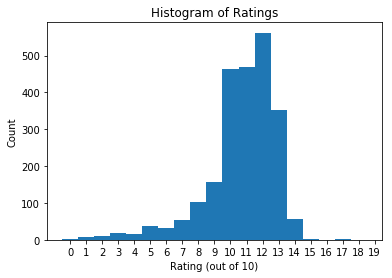

In [62]:
# Plot the ratings that are less than 20
plt.hist(twitter_master.rating_numerator[twitter_master.rating_numerator <= 20], 
         bins=np.arange(0,20,step=1), align='left');
plt.xticks(np.arange(0,20,step=1));
plt.title('Histogram of Ratings');
plt.xlabel('Rating (out of 10)');
plt.ylabel('Count');

###### Observation

- Ratings 10/10 to 13/10 are the most popular, with 12/10 being the most-used rating. 
- The mean rating is approximately 12.2/10. 
- The median rating is 11/10.

Ratings > 20 were mostly used for the significance of the number in relation to the photo or text, rather than an actual attempt at a rating. For instance, the rating of 1776/10 was used for a 'patriotic' dog, since 1776 is the year that the USA was founded.

###### Most popular type of dogs

In [64]:
twitter_master.prediction1_p1.value_counts()

golden_retriever             149
labrador_retriever           100
pembroke                      89
chihuahua                     83
pug                           57
chow                          44
samoyed                       43
toy_poodle                    39
pomeranian                    38
cocker_spaniel                30
malamute                      30
french_bulldog                26
miniature_pinscher            23
chesapeake_bay_retriever      23
seat_belt                     22
german_shepherd               20
siberian_husky                20
staffordshire_bullterrier     20
cardigan                      19
web_site                      19
shetland_sheepdog             18
beagle                        18
maltese_dog                   18
eskimo_dog                    18
teddy                         18
rottweiler                    17
lakeland_terrier              17
shih-tzu                      17
kuvasz                        16
italian_greyhound             16
          

In [66]:
# Find the top dogs
top_dog_counts = twitter_master.prediction1_p1.value_counts(normalize=True)

top_dogs = twitter_master.prediction1_p1.value_counts().index.tolist()

In [67]:
count = 0

while count < 10:
    print('{}: {}%'.format(top_dogs[count], round(top_dog_counts[count]*100,2)))
    count +=1

golden_retriever: 7.18%
labrador_retriever: 4.82%
pembroke: 4.29%
chihuahua: 4.0%
pug: 2.75%
chow: 2.12%
samoyed: 2.07%
toy_poodle: 1.88%
pomeranian: 1.83%
cocker_spaniel: 1.45%


In [69]:
twitter_master[twitter_master.prediction1_p1=='golden_retriever'].iloc[0]

tweet_id                                                      889531135344209921
in_reply_to_status_id                                                        NaN
in_reply_to_user_id                                                          NaN
source                         <a href="http://twitter.com/download/iphone" r...
text                           This is Stuart. He's sporting his favorite fan...
retweeted_status_id                                                          NaN
retweeted_status_user_id                                                     NaN
expanded_urls                  https://twitter.com/dog_rates/status/889531135...
rating_numerator                                                              13
rating_denominator                                                            10
name                                                                      Stuart
doggo                                                                       None
floofer                     

###### Golden Retriever
!['golden_retriever'](https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg)



In [71]:
twitter_master[twitter_master.prediction1_p1=='labrador_retriever'].iloc[1]

tweet_id                                                      882762694511734784
in_reply_to_status_id                                                        NaN
in_reply_to_user_id                                                          NaN
source                         <a href="http://twitter.com/download/iphone" r...
text                           This is Gus. He's quite the cheeky pupper. Alr...
retweeted_status_id                                                          NaN
retweeted_status_user_id                                                     NaN
expanded_urls                  https://twitter.com/dog_rates/status/882762694...
rating_numerator                                                              12
rating_denominator                                                            10
name                                                                         Gus
doggo                                                                       None
floofer                     

###### Labrador Retriever
!['labrador_retriever'](https://pbs.twimg.com/media/DEAz_HHXsAA-p_z.jpg)


In [72]:
twitter_master[twitter_master.prediction1_p1=='pembroke'].iloc[0]

tweet_id                                                      890240255349198849
in_reply_to_status_id                                                        NaN
in_reply_to_user_id                                                          NaN
source                         <a href="http://twitter.com/download/iphone" r...
text                           This is Cassie. She is a college pup. Studying...
retweeted_status_id                                                          NaN
retweeted_status_user_id                                                     NaN
expanded_urls                  https://twitter.com/dog_rates/status/890240255...
rating_numerator                                                              14
rating_denominator                                                            10
name                                                                      Cassie
doggo                                                                      doggo
floofer                     

###### Pembroke
!['pembroke'](https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg)

###### Observation

- There is a lot of variety in this column.
- There are also many cases where the prediction is not a dog.
- But, the most popular tweets are related to golden retrievers, labrador retrievers and pembrokes.

###### Favorite Count vs Retweet Count

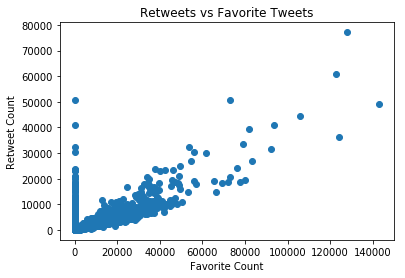

In [68]:
# Plot
plt.scatter(twitter_master.fav_count, twitter_master.retweet_count)
plt.xlabel('Favorite Count')
plt.ylabel('Retweet Count')
plt.title('Retweets vs Favorite Tweets');

###### Observation

- There seems to be a fairly linear relationship between favorite_count and retweet_count.
- However, there is that vertical bar of 0 'favorites' and yet lots of retweets, indicating that the relationship is a little more complicated.

### References

1. Setting up Twitter API access - https://www.slickremix.com/docs/how-to-get-api-keys-and-tokens-for-twitter/
2. Getting tweet info by ID - https://stackoverflow.com/questions/28384588/twitter-api-get-tweets-with-specific-id
3. Writing to JSON files - http://stackabuse.com/reading-and-writing-json-to-a-file-in-python/
4. Handling Twitter Rate Limit with a cursor - https://stackoverflow.com/questions/21308762/avoid-twitter-api-limitation-with-tweepy
5. Split list of IDs into blocks - https://stackoverflow.com/questions/312443/how-do-you-split-a-list-into-evenly-sized-chunks
6. Constructing data frame with named columns from dict - https://stackoverflow.com/questions/20340844/pandas-create-named-columns-in-dataframe-from-dict
7. Quick way to get rid of rows with certain NaN columns - https://stackoverflow.com/questions/13413590/how-to-drop-rows-of-pandas-dataframe-whose-value-in-certain-columns-is-nan
8. Get values from value_counts - https://stackoverflow.com/questions/35523635/extract-values-in-pandas-value